# Social Network Analysis

#### An analysis of network technology tags from Developer stories on the Stack Overflow website is performed. There are two datasets one with stack_network_links.csv containing links of the network and stack_network_nodes.csv contains nodes of the network, and these are taken from kaggle.


In [5]:
#Importing the dataset and libraries
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
edges=pd.read_csv("stack_network_links.csv")
nodes=pd.read_csv("stack_network_nodes.csv")

In [6]:
edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [7]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [8]:
#Creating the graph
G = nx.Graph()
for index, row in nodes.iterrows():
    G.add_node(row["name"],group = row["group"], nodesize = row["nodesize"] )
for index, row in edges.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])

In [9]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 115\nNumber of edges: 245\nAverage degree:   4.2609'

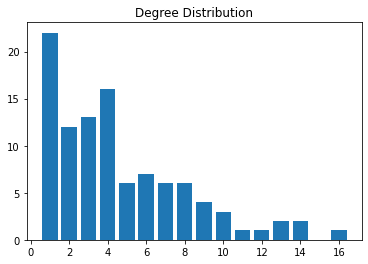

In [19]:
#A bar chart to visualise the degree distribution in this graph
import collections
components = nx.connected_components(G)
largest_component = max(components, key=len)
G_large = G.subgraph(largest_component)
def plot_degree_distribution(G_large):
    degree_sequence = sorted([d for n, d in G_large.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.title("Degree Distribution")
    plt.bar(deg, cnt)  
plot_degree_distribution(G_large)

In [20]:
#The average distance
print(nx.average_shortest_path_length(G_large))

4.507862550960978


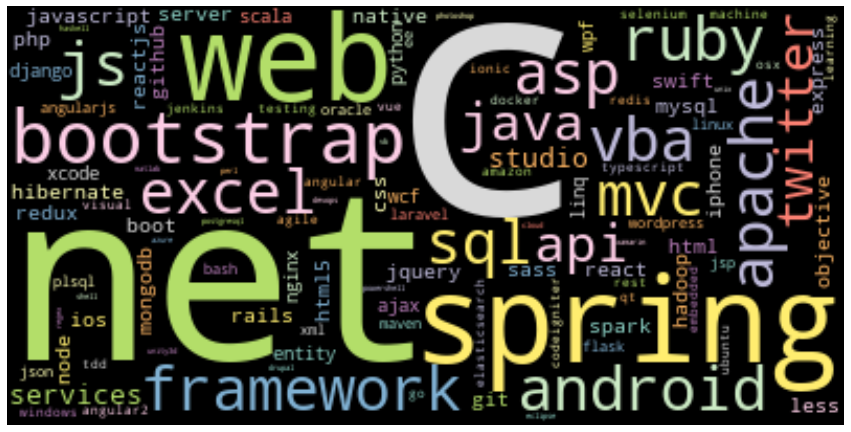

<Figure size 720x432 with 0 Axes>

In [11]:
#word cloud with node names 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in nodes.name)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

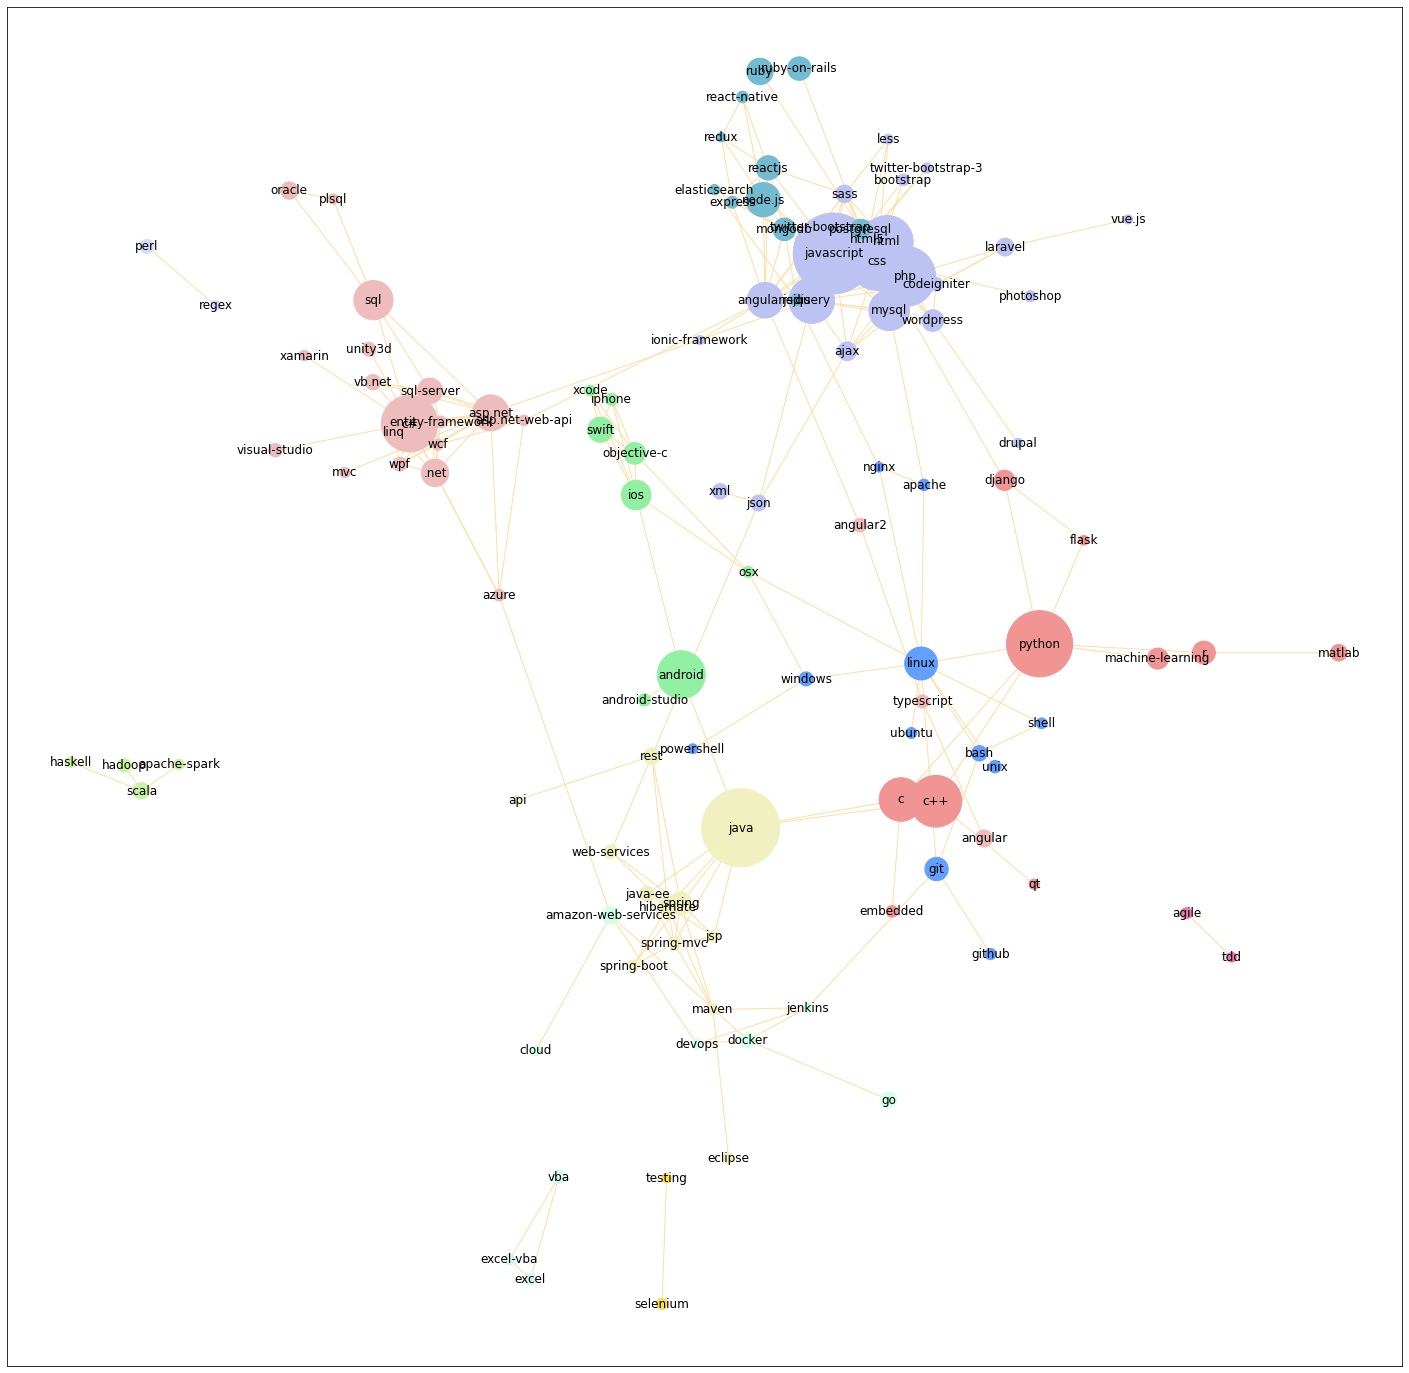

In [14]:
#Displaying the network with node file data
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,edge_color='#FFDEA2')
    plt.show()
draw_graph(G,size=(25,25))

In [15]:
#Determining the cliques in the graph
cliques = list(nx.find_cliques(G))
clique_number = len(list(cliques))
for clique in cliques:
    print(clique)

['ruby', 'postgresql', 'ruby-on-rails']
['spring', 'hibernate', 'spring-mvc', 'spring-boot']
['spring', 'hibernate', 'spring-mvc', 'maven']
['spring', 'hibernate', 'spring-mvc', 'java', 'jsp']
['spring', 'hibernate', 'spring-mvc', 'java', 'java-ee']
['spring', 'hibernate', 'rest', 'web-services']
['mvc', 'asp.net']
['apache-spark', 'hadoop', 'scala']
['machine-learning', 'python', 'r']
['jquery', 'asp.net']
['jquery', 'twitter-bootstrap-3', 'html5']
['jquery', 'codeigniter', 'php', 'mysql', 'ajax']
['jquery', 'codeigniter', 'php', 'wordpress']
['jquery', 'json', 'ajax']
['jquery', 'css', 'bootstrap']
['jquery', 'css', 'javascript', 'php', 'mysql', 'html']
['jquery', 'css', 'javascript', 'php', 'mysql', 'ajax']
['jquery', 'css', 'javascript', 'php', 'html5']
['jquery', 'css', 'javascript', 'twitter-bootstrap', 'sass', 'angularjs', 'html5']
['jquery', 'css', 'javascript', 'sass', 'html']
['jquery', 'css', 'wordpress', 'php', 'html5']
['github', 'git']
['vue.js', 'laravel']
['laravel', 'c

Name: 
Type: Graph
Number of nodes: 16
Number of edges: 55
Average degree:   6.8750


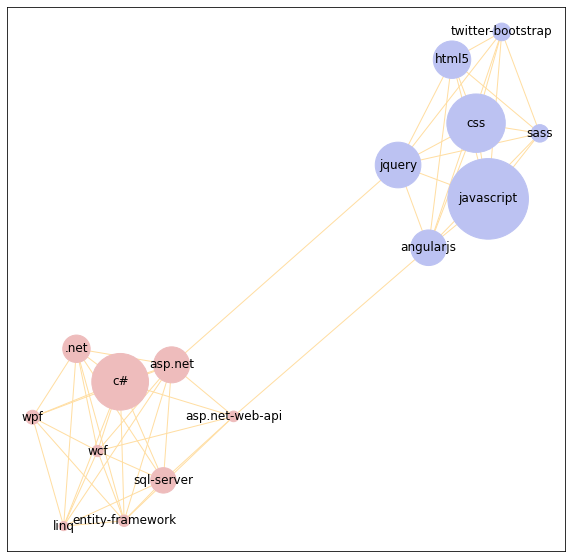

In [17]:
#Visualising maximum cliques
sorted_cliques = sorted(list(nx.find_cliques(G)),key=len)
max_clique_nodes = set()

for nodelist in sorted_cliques[-4:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)
max_clique = G.subgraph(max_clique_nodes)
print(nx.info(max_clique))
draw_graph(max_clique,size=(10,10))

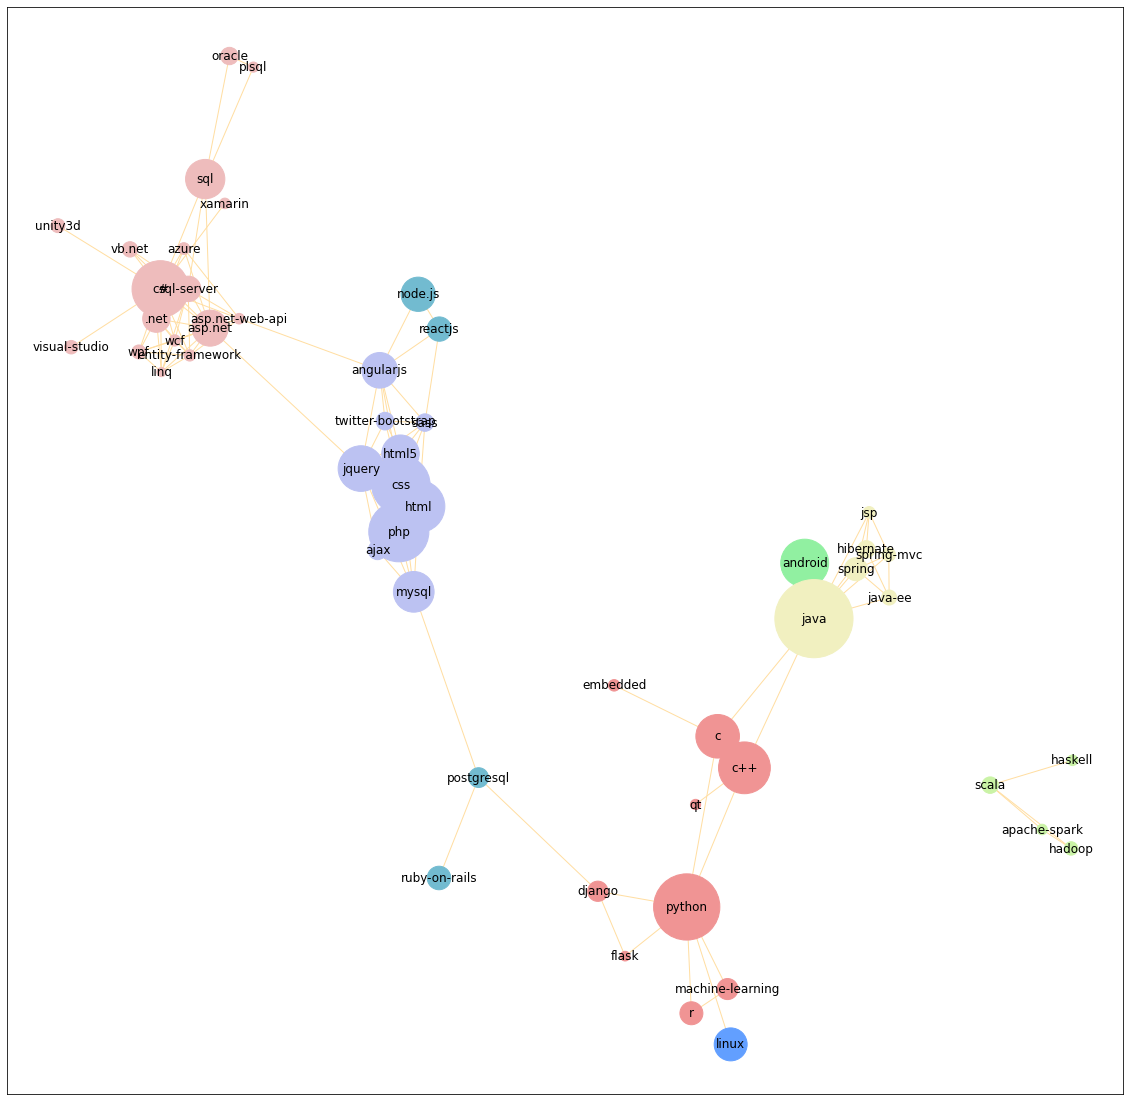

In [16]:
#Visualising network for major programming languages
major_languages = ['c','c++','c#','java','python','ruby','scala','haskell','javascript','sql']
p_language_nodes = []
for language in major_languages:
    neighbors = G.neighbors(language)
    p_language_nodes.extend(neighbors)
programming_language_graph = G.subgraph(set(p_language_nodes))
draw_graph(programming_language_graph,size=(20,20))